# AGU 2023 Tutorial: Visualizing 2D and 3D Geoscience Data in Python
## Set "homeDir" to example data directory
## [Download example data here](https://drive.google.com/file/d/1ROJ4lSDjiZPy_iUefTFc372kOoLnr9aL/view?usp=sharing)

In [1]:
#homeDir = "/Users/pearse/Examples/AGU2023"
homeDir = "/Users/pearse/Downloads/AGU2023"

## Create a new Session

In [2]:
from vapor import session
ses = session.Session()

Vapor 3.9.0
Python 3.9.18 (/Users/pearse/miniconda3/envs/3.9.1)
OpenGL 4.1 Metal - 83.1


## Find documentation

In [3]:
help(session.Session)

# Renderer  - help(renderer.Renderer)
# Camera    - help(camera.Camera)
# Animation - help(animation.Amimation)
# https://ncar.github.io/VaporDocumentationWebsite/pythonAPIReference/classReference.html

Help on class Session in module vapor.session:

class Session(cppyy.gbl.Session)
 |  Method resolution order:
 |      Session
 |      cppyy.gbl.Session
 |      cppyy.gbl.CPPInstance
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  CreatePythonDataset(self)
 |      Creates a python dataset or returns one if it already exists for the current session.
 |  
 |  DeleteRenderer(self, renderer: vapor.renderer.Renderer)
 |      void Session::DeleteRenderer(String name)
 |  
 |  GetAxisAnnotations(self) -> vapor.annotations.AxisAnnotation
 |  
 |  GetCamera(self)
 |  
 |  GetDataset(self, name) -> vapor.dataset.Dataset
 |  
 |  GetDatasets(self)
 |  
 |  GetRenderer(self, name)
 |  
 |  GetRenderers(self) -> list[vapor.renderer.Renderer]
 |  
 |  GetSceneAnnotations(self) -> vapor.annotations.SceneAnnotation
 |  
 |  NewRenderer(self, Class: vapor.renderer.Renderer, datasetName: str) -> vapor.renderer.Renderer
 |      std::string Session::NewRenderer(String type, String dataset =

## Load data

In [4]:
from pathlib import Path
myPath  = homeDir + "/data"
myFiles = [str(file) for file in Path(myPath).rglob('*')]

for file_path in myFiles:
    print(file_path)

from vapor import dataset
data = ses.OpenDataset(dataset.WRF, myFiles)

/Users/pearse/Downloads/AGU2023/data/wrfout_met_d02_2020-10-22_12:00:00.slab
/Users/pearse/Downloads/AGU2023/data/wrfout_met_d02_2020-10-22_17:00:00.slab
/Users/pearse/Downloads/AGU2023/data/wrfout_met_d02_2020-10-22_10:00:00.slab
/Users/pearse/Downloads/AGU2023/data/wrfout_met_d02_2020-10-22_18:00:00.slab
/Users/pearse/Downloads/AGU2023/data/wrfout_met_d02_2020-10-22_15:00:00.slab
/Users/pearse/Downloads/AGU2023/data/wrfout_met_d02_2020-10-22_16:00:00.slab
/Users/pearse/Downloads/AGU2023/data/wrfout_met_d02_2020-10-22_13:00:00.slab
/Users/pearse/Downloads/AGU2023/data/wrfout_met_d02_2020-10-22_14:00:00.slab
/Users/pearse/Downloads/AGU2023/data/wrfout_met_d02_2020-10-22_11:00:00.slab


## Show dataset metadata

### Coordinate variables

In [5]:
print("Time Coordinate Variable Name:", data.GetTimeCoordVarName())
print("Coordinate Variable Names:", data.GetCoordVarNames())

Time Coordinate Variable Name: Time
Coordinate Variable Names: ['Time', 'XLAT', 'XLAT_U', 'XLAT_V', 'XLONG', 'XLONG_U', 'XLONG_V', 'bottom_top', 'bottom_top_stag', 'Elevation', 'ElevationU', 'ElevationV', 'ElevationW', 'XLATY', 'XLAT_UY', 'XLAT_VY', 'XLONGX', 'XLONG_UX', 'XLONG_VX']


### Variables

In [6]:
print("Data Variables:")
for var in data.GetDataVarNames():
    print(f"  {var}")
    print(f"    Time Varying:", bool(data.IsTimeVarying(var)))
    print(f"    Dimensionality:", data.GetVarGeometryDim(var))
    print(f"    Coordinates:", data.GetVarCoordVars(var, True))
    print("     Data Range:", data.GetDataRange(var))

Data Variables:
  FIRE_AREA
    Time Varying: True
    Dimensionality: 2
    Coordinates: ['XLONGX', 'XLATY']
     Data Range: [0.0, 1.0]
  HGT
    Time Varying: True
    Dimensionality: 2
    Coordinates: ['XLONGX', 'XLATY']
     Data Range: [2244.004638671875, 4026.545654296875]
  PH
    Time Varying: True
    Dimensionality: 3
    Coordinates: ['XLONGX', 'XLATY', 'ElevationW']
     Data Range: [0.0, 765.3257446289062]
  PHB
    Time Varying: True
    Dimensionality: 3
    Coordinates: ['XLONGX', 'XLATY', 'ElevationW']
     Data Range: [22013.685546875, 52509.6484375]
  U
    Time Varying: True
    Dimensionality: 3
    Coordinates: ['XLONG_UX', 'XLAT_UY', 'ElevationU']
     Data Range: [-13.070408821105957, 38.378875732421875]
  V
    Time Varying: True
    Dimensionality: 3
    Coordinates: ['XLONG_VX', 'XLAT_VY', 'ElevationV']
     Data Range: [-14.471896171569824, 20.526811599731445]
  W
    Time Varying: True
    Dimensionality: 3
    Coordinates: ['XLONGX', 'XLATY', 'ElevationW

## Create a 2D Data renderer

In [7]:
from vapor import renderer
ren = data.NewRenderer(renderer.TwoDDataRenderer)
ren.SetVariableName("FIRE_AREA") # Set to first 2D data variable

## Show the renderer

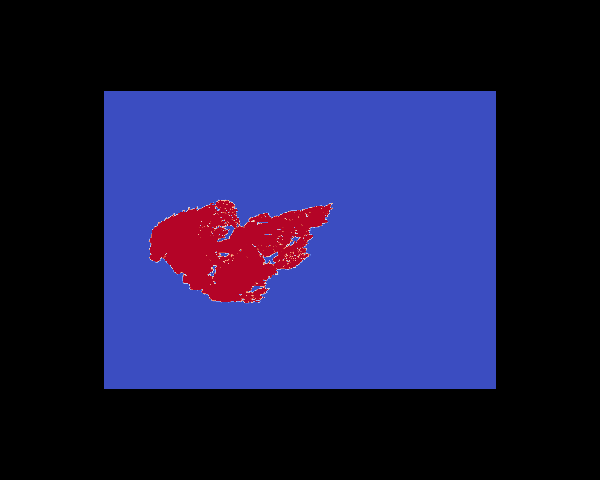

In [8]:
ses.Show()

## Apply a height variable

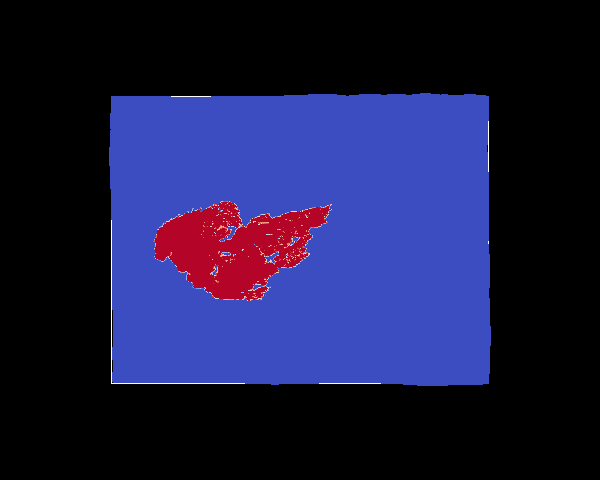

In [9]:
ren.SetHeightVariableName("HGT")
ses.Show()

## Create an interactive Visualizer with VaporVisualizerWidget()

In [10]:
from jupyter_vapor_widget import *
viz = VaporVisualizerWidget(ses)
viz.Render()
viz

VaporVisualizerWidget(imageData='/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aH…

## Show a Transfer Function

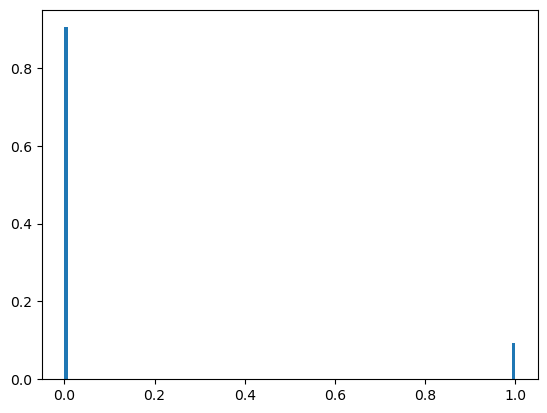

In [11]:
from vapor import utils
utils.ShowMatPlotLibHistogram(ses, ren)

## Apply opacity to a Transfer Function

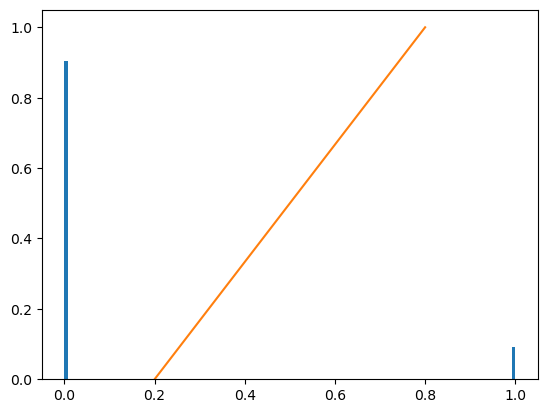

In [12]:
plt = utils.GetMatPlotLibHistogram(ses, ren)
opacities = [(0.2, 0), (0.8, 1)]
plt.plot(*zip(*opacities))
plt.show()

## Render the current Session in an interactive Visualizer

In [13]:
tf = ren.GetPrimaryTransferFunction()
tf.SetOpacityControlPoints(opacities)
viz.Render()
viz

VaporVisualizerWidget(imageData='/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aH…

## Load a builtin Transfer Function

In [14]:
tf.LoadBuiltinColormap("Sequential/BlackBody")
viz.Render()
viz

VaporVisualizerWidget(imageData='/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aH…

## Load a Transfer Function that was configured in VAPOR

In [16]:
tf.LoadColormapFromFile( homeDir + "/fireArea.tf3")
viz.Render()
viz

VaporVisualizerWidget(imageData='/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aH…

## Interactive Sliders - Open visualizer_widget_example.ipynb

## *** Back to VAPOR for DVR and Python Engine ***

## Timeseries Animation

In [ ]:
%%time
from vapor.animation import Animation
ses.Load( homeDir + "/et_1.vs3")
anim = Animation(ses)
timesteps = ses.GetTimesteps()
for ts in range(0, timesteps):
    ses.SetTimestep(ts)
    anim.CaptureFrame()
anim.ShowInteractive()

## Keyframing

In [ ]:
# Import necessary modules

from vapor import session, camera

In [ ]:
# Acquire the camera settings from an initial session file

ses1 = session.Session()
#ses1.Load("/Users/pearse/Examples/eastTroublesome/et_1.vs3")
ses1.Load(homeDir + "/et_1.vs3")
#ses1.Load("~/Examples/eastTroublesome/et_1.vs3")

cam1 = ses1.GetCamera()
dir1 = cam1.GetDirection()
pos1 = cam1.GetPosition()
up1 = cam1.GetUp()

In [ ]:
# Acquire the camera settings from a secondary session file that we will transition into

ses2 = session.Session()
ses2.Load( homeDir + "/et_2.vs3")
cam2 = ses2.GetCamera()
dir2 = cam2.GetDirection()
pos2 = cam2.GetPosition()
up2 = cam2.GetUp()

In [ ]:
# Difference between camera positions on each axis
dPositionX  = (pos2[0] - pos1[0])
dPositionY  = (pos2[1] - pos1[1])
dPositionZ  = (pos2[2] - pos1[2])

# Difference between camera direction vectors on each axis
dDirectionX = (dir2[0] - dir1[0])
dDirectionY = (dir2[1] - dir1[1])
dDirectionZ = (dir2[2] - dir1[2])

# Difference between camera up vectors on each axis
dUpX        = (up2[0] - up1[0])
dUpY        = (up2[1] - up1[1])
dUpZ        = (up2[2] - up1[2])

In [ ]:
# Perform a linear interoplation between the Camera's start position, direction, and up vector

steps=50
for i in range(0,steps):
    position = [
        pos1[0]+dPositionX*i/steps,
        pos1[1]+dPositionY*i/steps,
        pos1[2]+dPositionZ*i/steps
    ]
    cam1.SetPosition( position )

    direction = [
        dir1[0]+dDirectionX*i/steps,
        dir1[1]+dDirectionY*i/steps,
        dir1[2]+dDirectionZ*i/steps
    ]
    cam1.SetDirection( direction )

    up = [
        up1[0]+dUpX*i/steps,
        up1[1]+dUpY*i/steps,
        up1[2]+dUpZ*i/steps
    ]
    cam1.SetUp( up )
    ses1.Render( homeDir + "captures/" + str(i) + ".png")

## Camera Orbit

In [ ]:
# Import necessary modules

import cv2, os
from vapor import session, animation
from numpy import cross, eye, dot, radians, asarray, array
from scipy.linalg import expm, norm
UseValueFromSessionFile = None

In [ ]:
# Configure various parameters for rotating the camera around the scene
session_path = homeDir + "/et_2.vs3"
output = "rotation.mp4"
video_framerate = 30
video_resolution = (640, 480)
data_timestep_framerate = 0  # set to zero to disable
duration = 4  # seconds
rotate_speed = 45  # deg/s
rotation_axis = [0,0,1]  # Z (up)
rotation_center = UseValueFromSessionFile  # Can be replaced with [x,y,z] coordinates here
save_individual_frames = False

In [ ]:
# Configure our session according to the parameters that were defined above

session_path, output = [os.path.expanduser(p) for p in (session_path, output)]
n_frames = video_framerate * duration

ses = session.Session()
ses.Load(session_path)
ses.SetResolution(*video_resolution)
cam = ses.GetCamera()
pos, dir, up, tgt = [asarray(x) for x in [cam.GetPosition(), cam.GetDirection(), cam.GetUp(), cam.GetTarget()]]
if rotation_center:
    tgt = asarray(rotation_center)

In [ ]:
# Define a function that returns a matrix exponential for rotating the camera 

def rotation_matrix(axis, theta):
    return expm(cross(eye(3), axis / norm(axis) * theta))

In [ ]:
anim = animation.Animation(ses)
for i in range(0, n_frames):
    print(f"Rendering... [{'#'*round(40*i/(n_frames-1))}{' '*round(40*(1-i/(n_frames-1)))}] {100*(i+1)/n_frames:.0f}%", end="\r" if i < n_frames-1 else "\n")

    ses.SetTimestep(int(data_timestep_framerate * i / video_framerate))

    M = rotation_matrix(rotation_axis, radians(rotate_speed) * i / video_framerate)
    cam.SetPosition(dot(M, pos - tgt) + tgt)
    cam.SetDirection(dot(M, dir))
    cam.SetUp(dot(M, up))
    anim.CaptureFrame()
    if save_individual_frames:
        ses.Render(f"{output}_{i:04}.png")

anim.SaveMP4(output, video_framerate)